# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.tail()

,reviews
1995,✅ Verified Review | Gatwick to Barcelona retu...
1996,✅ Verified Review | Sofia to London Heathrow....
1997,✅ Verified Review | Washington to Barcelona r...
1998,✅ Verified Review | Vancouver to London Heath...
1999,✅ Verified Review | London Heathrow to Milan ...


In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,Cargo service: that's how I felt in the A380 ...
1,Inefficient and slow airport operation. Resti...
2,The customer service is one of the worst I h...
3,"Before my flight, I was forced by the ground ..."
4,British Airways at its best. Outstanding se...
...,...
1995,"Gatwick to Barcelona return, and just dreadf..."
1996,Sofia to London Heathrow. The flight was on ...
1997,Washington to Barcelona return via London (p...
1998,"Vancouver to London Heathrow, and I was real..."


In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Cargo service: that's how I felt in the A380 ...,Cargo service that s how I felt in the A uppe...
1,Inefficient and slow airport operation. Resti...,Inefficient and slow airport operation Restin...
2,The customer service is one of the worst I h...,The customer service is one of the worst I ha...
3,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...
4,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...


In [ ]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,Cargo service: that's how I felt in the A380 ...,Cargo service that s how I felt in the A uppe...,"[(Cargo, n), (service, n), (felt, v), (upper, ..."
1,Inefficient and slow airport operation. Resti...,Inefficient and slow airport operation Restin...,"[(Inefficient, n), (slow, a), (airport, n), (o..."
2,The customer service is one of the worst I h...,The customer service is one of the worst I ha...,"[(customer, n), (service, n), (one, None), (wo..."
3,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...,"[(flight, n), (forced, v), (ground, n), (staff..."
4,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...,"[(British, a), (Airways, n), (best, a), (Outst..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Cargo service: that's how I felt in the A380 ...,Cargo service that s how I felt in the A uppe...,"[(Cargo, n), (service, n), (felt, v), (upper, ...",Cargo service felt upper deck supposedly nic...
1,Inefficient and slow airport operation. Resti...,Inefficient and slow airport operation Restin...,"[(Inefficient, n), (slow, a), (airport, n), (o...",Inefficient slow airport operation Resting l...
2,The customer service is one of the worst I h...,The customer service is one of the worst I ha...,"[(customer, n), (service, n), (one, None), (wo...",customer service one bad ever see scheme giv...
3,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...,"[(flight, n), (forced, v), (ground, n), (staff...",flight force ground staff check new expensiv...
4,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...,"[(British, a), (Airways, n), (best, a), (Outst...",British Airways best Outstanding service fli...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Cargo service: that's how I felt in the A380 ...,Cargo service felt upper deck supposedly nic...
1,Inefficient and slow airport operation. Resti...,Inefficient slow airport operation Resting l...
2,The customer service is one of the worst I h...,customer service one bad ever see scheme giv...
3,"Before my flight, I was forced by the ground ...",flight force ground staff check new expensiv...
4,British Airways at its best. Outstanding se...,British Airways best Outstanding service fli...
...,...,...
1995,"Gatwick to Barcelona return, and just dreadf...",Gatwick Barcelona return dreadful pretty muc...
1996,Sofia to London Heathrow. The flight was on ...,Sofia London Heathrow flight time British Ai...
1997,Washington to Barcelona return via London (p...,Washington Barcelona return via London premi...
1998,"Vancouver to London Heathrow, and I was real...",Vancouver London Heathrow really really hop ...


In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Cargo service: that's how I felt in the A380 ...,Cargo service that s how I felt in the A uppe...,"[(Cargo, n), (service, n), (felt, v), (upper, ...",Cargo service felt upper deck supposedly nic...,0.9485,Positive
1,Inefficient and slow airport operation. Resti...,Inefficient and slow airport operation Restin...,"[(Inefficient, n), (slow, a), (airport, n), (o...",Inefficient slow airport operation Resting l...,-0.5423,Negative
2,The customer service is one of the worst I h...,The customer service is one of the worst I ha...,"[(customer, n), (service, n), (one, None), (wo...",customer service one bad ever see scheme giv...,-0.6769,Negative
3,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...,"[(flight, n), (forced, v), (ground, n), (staff...",flight force ground staff check new expensiv...,-0.6309,Negative
4,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...,"[(British, a), (Airways, n), (best, a), (Outst...",British Airways best Outstanding service fli...,0.9773,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,1002
Negative,764
Neutral,234


([<matplotlib.patches.Wedge at 0x79a2031088b0>,
 [Text(-0.003455701743252077, 1.099994571861817, 'Positive'),
  Text(-0.39205315203326996, -1.027761804106758, 'Negative'),
  Text(1.2598262106343676, -0.48511639737144574, 'Neutral')],
 [Text(-0.0018849282235920417, 0.5999970391973546, '50.1%'),
  Text(-0.21384717383632904, -0.5605973476945952, '38.2%'),
  Text(0.7932239103994165, -0.3054436576042436, '11.7%')])

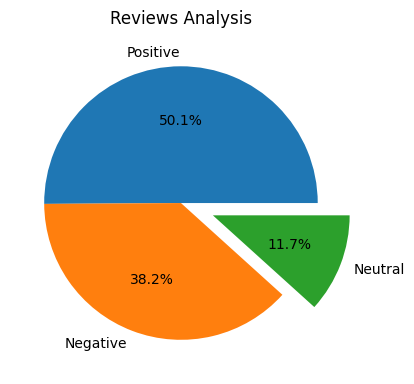

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

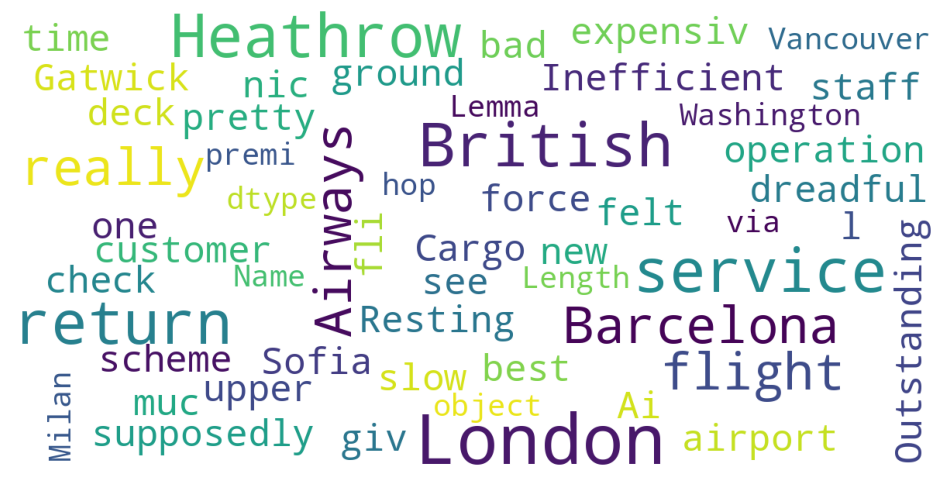

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)